In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
imgCv = cv2.imread("pic.jpg")
imgCv2 = cv2.imread("pic_02.jpg")
imgPlt = plt.imread("pic.jpg")
imgPlt2 = plt.imread("pic_02.jpg")

**2.1 Color Model Visualization**

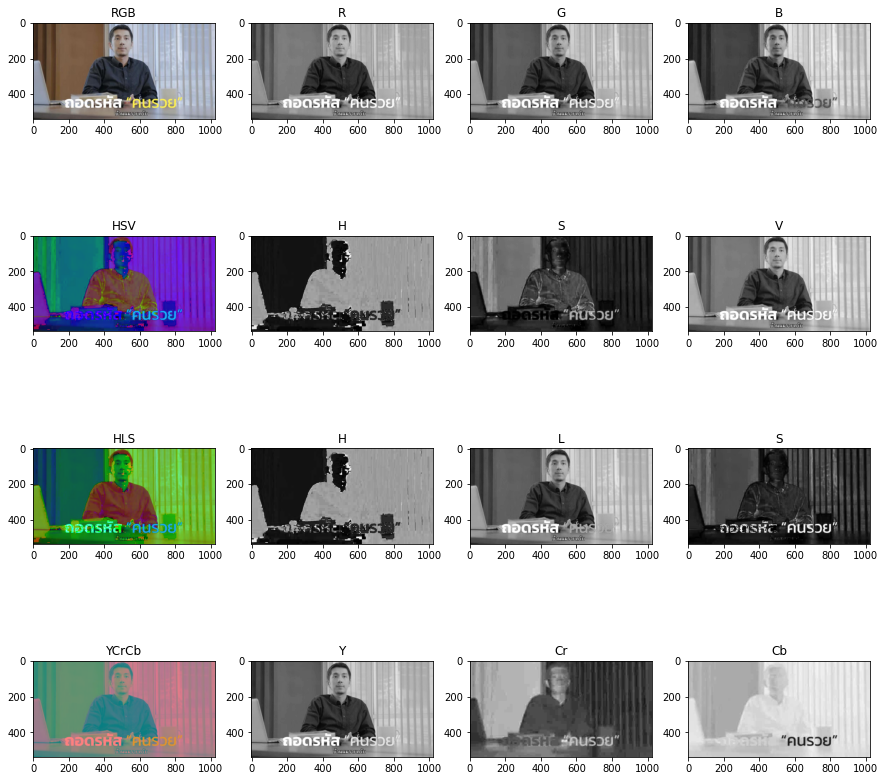

In [22]:
f, ax = plt.subplots(4, 4)
f.set_figheight(15)
f.set_figwidth(15)
f.set_facecolor("white")

# RGB
image_01 = cv2.cvtColor(imgCv, cv2.COLOR_BGR2RGB )
rr_01 = image_01
r_01 = rr_01[:, :, 0]
gg_01 = image_01
g_01 = gg_01[:, :, 1]
bb_01 = image_01
b_01 = bb_01[:, :, 2]
ax[0, 0].title.set_text("RGB")
ax[0, 0].imshow(image_01)
ax[0, 1].title.set_text("R")
ax[0, 1].imshow(r_01, cmap='gray')
ax[0, 2].title.set_text("G")
ax[0, 2].imshow(g_01, cmap='gray')
ax[0, 3].title.set_text("B")
ax[0, 3].imshow(b_01, cmap='gray')

#HSV
image_02 = cv2.cvtColor(imgPlt, cv2.COLOR_RGB2HSV )
hh_02 = image_02
h_02 = hh_02[:, :, 0]
ss_02 = image_02
s_02 = ss_02[:, :, 1]
vv_02 = image_02
v_02 = vv_02[:, :, 2]
ax[1, 0].title.set_text("HSV")
ax[1, 0].imshow(image_02)
ax[1, 1].title.set_text("H")
ax[1, 1].imshow(h_02, cmap='gray')
ax[1, 2].title.set_text("S")
ax[1, 2].imshow(s_02, cmap='gray')
ax[1, 3].title.set_text("V")
ax[1, 3].imshow(v_02, cmap='gray')

#HLS
image_03 = cv2.cvtColor(imgPlt, cv2.COLOR_RGB2HLS )
hh_03 = image_03
h_03 = hh_03[:, :, 0]
ll_03 = image_03
l_03 = ll_03[:, :, 1]
ss_03 = image_03
s_03 = ss_03[:, :, 2]
ax[2, 0].title.set_text("HLS")
ax[2, 0].imshow(image_03)
ax[2, 1].title.set_text("H")
ax[2, 1].imshow(h_03, cmap='gray')
ax[2, 2].title.set_text("L")
ax[2, 2].imshow(l_03, cmap='gray')
ax[2, 3].title.set_text("S")
ax[2, 3].imshow(s_03, cmap='gray')

#YCrCb
image_04 = cv2.cvtColor(imgPlt, cv2.COLOR_RGB2YCrCb )
yy_04 = image_04
y_04 = yy_04[:, :, 0]
rr_04 = image_04
r_04 = rr_04[:, :, 1]
bb_04 = image_04
b_04 = bb_04[:, :, 2]
ax[3, 0].title.set_text("YCrCb")
ax[3, 0].imshow(image_04)
ax[3, 1].title.set_text("Y")
ax[3, 1].imshow(y_04, cmap='gray')
ax[3, 2].title.set_text("Cr")
ax[3, 2].imshow(r_04, cmap='gray')
ax[3, 3].title.set_text("Cb")
ax[3, 3].imshow(b_04, cmap='gray')

# ax[0, 0].axis('off')
# ax[0, 1].axis('off')
# ax[0, 2].axis('off')
# ax[0, 3].axis('off')
# ax[1, 0].axis('off')
# ax[1, 1].axis('off')
# ax[1, 2].axis('off')
# ax[1, 3].axis('off')
# ax[2, 0].axis('off')
# ax[2, 1].axis('off')
# ax[2, 2].axis('off')
# ax[2, 3].axis('off')
# ax[3, 0].axis('off')
# ax[3, 1].axis('off')
# ax[3, 2].axis('off')
# ax[3, 3].axis('off')
plt.savefig('act2_1.png', facecolor=f.get_facecolor(), transparent=True)
# plt.show()

**2.2 Image Addition**

In [8]:
W1, W2 = [],[]

for i in range(20):
    w1 = 0+(i/20)
    w2 = 1-(i/20)
    W1.append(round(w1,2))
    W2.append(round(w2,2))
    
print(W1,W2)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95] [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]


In [9]:
dim = (1024, 576)
resized_Img01 = cv2.resize(imgCv, dim, interpolation = cv2.INTER_AREA)
resized_Img02 = cv2.resize(imgCv2, dim, interpolation = cv2.INTER_AREA)

In [10]:
Frame = []

for i in range(20):
    frame = cv2.addWeighted(resized_Img01,W1[i],resized_Img02,W2[i],0)
    Frame.append(frame)

In [11]:
file_path = 'blending_mr_van.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter(file_path, fourcc, 10, (1024, 576))

for frame in Frame:
    writer.write(frame)
    
for frame in reversed(Frame):
    writer.write(frame)

writer.release()
print("Finished")


Finished


**2.3 Image Bitwise AND operation**

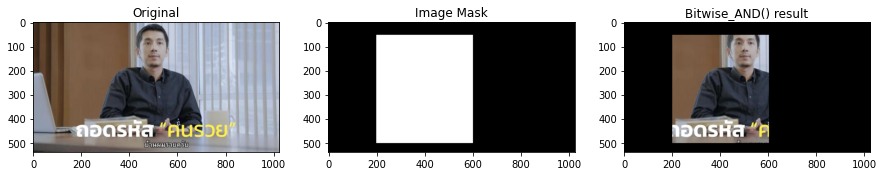

In [23]:
mask = np.zeros(imgPlt.shape[:2], dtype="uint8")
cv2.rectangle(mask, (200, 53), (600, 500), 255, -1)
masked = cv2.bitwise_and(imgPlt, imgPlt, mask=mask)

f, axarr = plt.subplots(1,3)

f.set_figheight(15)
f.set_figwidth(15)
f.set_facecolor("white")
axarr[0].title.set_text("Original")
axarr[0].imshow(imgPlt)
axarr[1].title.set_text("Image Mask")
axarr[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB ))
axarr[2].title.set_text("Bitwise_AND() result")
axarr[2].imshow(masked)
plt.savefig('act2_3.png', facecolor=f.get_facecolor(), transparent=True)